0               C=C
1               C=O
2               C#N
3               CCO
4          CCC(=O)O
5            CN=C=O
6        C1=CCC=CC1
7       C1=CC=CC=C1
8    C1=C(C)C=CC=C1
9    C1CCC2CCCCC2C1
Name: smiles, dtype: object
C=O


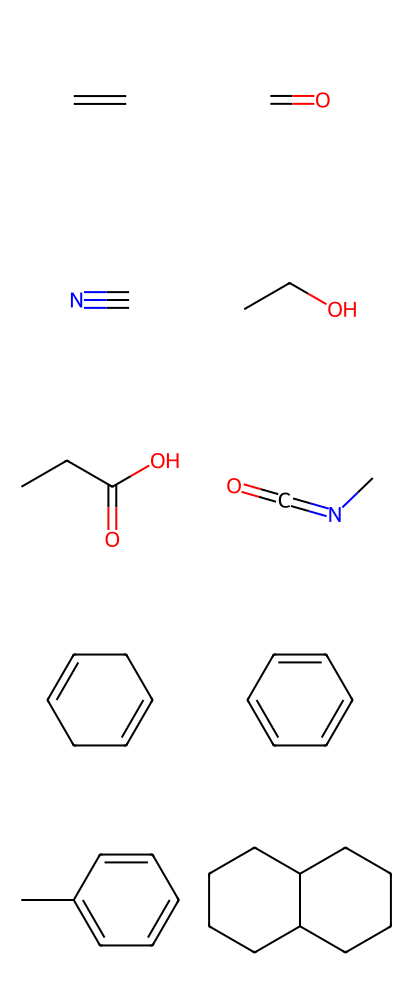

In [13]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from psikit import Psikit


# read in smiles strings from the first column of 'smiles.csv'
df = pd.read_csv('smiles.csv', header=None, names=['smiles'],skiprows=1)
print(df.smiles)
print(df.smiles[1])

# Print molecules in grid
mols = [Chem.MolFromSmiles(smi) for smi in df.smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [14]:
# enables using RDKit molecules as columns of a Pandas Dataframe
from rdkit.Chem import PandasTools
print(df.head(1))

# Add ROMol to Pandas Dataframe.
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
print(df.head(1))
print(type(df.ROMol[0]))

# Draw the structures in grid.
PandasTools.FrameToGridImage(df.head(8), legendsCol="smiles", molsPerRow=4)

# Adding new columns of properites use Pandas map method.
df["n_Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())
df.head(1)

  smiles
0    C=C
  smiles                                             ROMol
0    C=C  <rdkit.Chem.rdchem.Mol object at 0x7feb59bc39e0>
<class 'rdkit.Chem.rdchem.Mol'>


,smiles,ROMol,n_Atoms
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x7feb59bc39e0>,2


In [15]:
import numpy as np
energy_data = []

for smi in df.smiles:
    %time
    pk=Psikit(debug=True,threads=1,memory=18)
    pk.read_from_smiles(smi)
    energy=pk.optimize()
    print("Optimized SCF Energy for",smi,":", energy)
    energy_data=np.append(energy_data,energy)



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Optimizer: Optimization complete!
Optimized SCF Energy for C=C : -78.038769412464
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
Optimizer: Optimization complete!
Optimized SCF Energy for C=O : -113.86953646696725
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Optimizer: Optimization complete!
Optimized SCF Energy for C#N : -92.87694247781137
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Optimizer: Optimization complete!
Optimized SCF Energy for CCO : -154.08991870729767
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Optimizer: Optimization complete!
Optimized SCF Energy for CCC(=O)O : -266.85898515778376
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Optimizer: Optimization complete!
Optimized SCF Energy for CN=C=O : -206.79559264289654
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Optimizer: Optimization complete!
Opti

In [16]:
# df["energy"] = [pk.optimize() for smi in df.smiles]
print(energy_data)
df["energy"] = energy_data
print(df)

[ -78.03876941 -113.86953647  -92.87694248 -154.08991871 -266.85898516
 -206.79559264 -231.84676148 -230.71352354 -269.75355217 -389.21612465]
           smiles                                             ROMol  n_Atoms  \
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x7feb59bc39e0>        2   
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x7feb59bc3a50>        2   
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x7febadf6ee40>        2   
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x7febadf6edd0>        3   
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x7febadf6ec10>        5   
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x7febadeb20b0>        4   
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x7feb591d6190>        6   
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x7feb591d6820>        6   
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x7feb591d6510>        7   
9  C1CCC2CCCCC2C1  <rdkit.Chem.rdchem.Mol object at 0x7fe

In [17]:
# save the dataframe to a csv file
df.to_csv('energy_table_updated.csv')